Grid: 
 [[ 8  1  9  3  7 10  5  2  3  5]
 [ 2  4  5  8  4  8  7  1  3  9]
 [ 4 11  3  1  8  4  1  2  4  3]
 [10  1  8 10  8  5  6  4 11  2]
 [ 7 11  8  6  7  7  8  9 10  6]
 [ 6 11  9 10  8  2  2  6  7 10]
 [ 6  5  8 10  1  1  5  5  6  6]]


Visualizing the Grid:




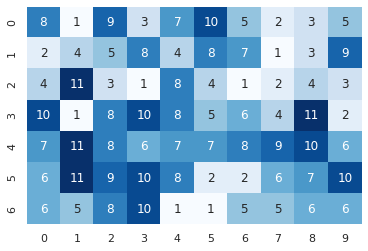

Number of rows:  7
Number of columns:  10
 
 --------------------------------------------------------------------
*Game Mode 1*
-------------------------------------------------------------------- 

The path travelled is:  [(0, 0), (0, 1), (1, 1), (1, 2), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 9), (3, 9), (4, 9), (5, 9), (6, 9)]


The cost of shortest path is:  60




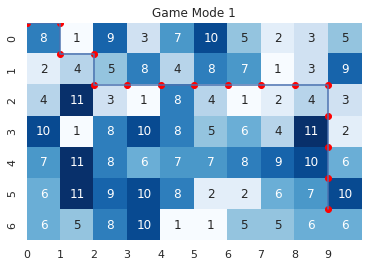


 --------------------------------------------------------------------
*Game Mode 2*
-------------------------------------------------------------------- 

The path travelled is:  [(0, 0), (1, 0), (1, 1), (1, 2), (2, 2), (2, 3), (2, 4), (3, 4), (4, 4), (4, 5), (4, 6), (4, 7), (4, 8), (5, 8), (6, 8), (6, 9)]


The cost of shortest path is:  91




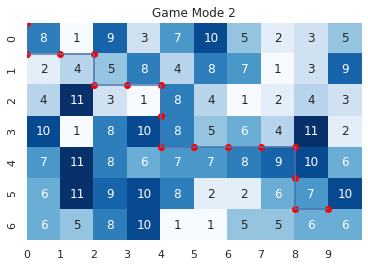

In [1]:
#Importing Libraries
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; sns.set()

class BuildGrid():
  #generating grid with random numbers
  def grid(self):
    #specifying limits for height and width of the grid
    h = np.random.randint(5,12)
    w = np.random.randint(5,12)
    #generating random cost for each cell between 1 and 12
    data = np.random.randint(1,12,size=(h,w))
    print("Grid: \n",data)
    return data

  def showgrid(self,g):
    print("\n")
    print("Visualizing the Grid:")
    print("\n")
    #visualizing the grid
    ax = sns.heatmap(g, annot=True, fmt="d", cbar = None, cmap=plt.cm.Blues)
    plt.show()

  def shortpath(self,g):
    #implementing game mode 1
    row = len(g) - 1
    col = len(g[0]) - 1
    #print(row)
    #print(col)
    i = j = cost = 0
    path1 = []
    path1.append((i,j))
    condition = True
    while(condition):
      if (i==row and j==col):
        condition = False
      else:
        if i < row:
          d = g[i+1][j]
        else: 
          d = 20     #any value greater than h & w to avoid Index out of bound error
        if j < col:
          r = g[i][j+1]
        else: 
          r = 20     #any value greater than h & w to avoid Index out of bound error
        if d < r:
          i = i + 1
          #print(i)
        else:
          j = j + 1
          #print(j)
        path1.append((i,j))
        cost = cost + g[i][j]
    print('*Game Mode 1*')
    print("-------------------------------------------------------------------- \n")
    print("The path travelled is: ",path1)
    print('\n')
    print("The cost of shortest path is: ", cost )
    print('\n')

    plt.title('Game Mode 1')
    ax = sns.heatmap(g, annot=True, fmt="d", cbar = None, cmap=plt.cm.Blues)
    x,y = zip(*path1)
    plt.plot(y,x)
    plt.scatter(y,x, color = "red")
    plt.xticks(np.arange(len(g[0])))
    plt.show()

    #implementing game mode 2
    i = j = cost = 0
    path2 = []
    path2.append((i,j))
    condition = True
    while(condition):
      if (i==row and j==col):
        condition = False
      else:
        if i < row:
          d = abs(g[i][j] - g[i+1][j])
        else: 
          d = 20     #any value greater than h & w to avoid Index out of bound error
        if j < col:
          r = abs(g[i][j] - g[i][j+1])
        else: 
          r = 20     #any value greater than h & w to avoid Index out of bound error
        if d < r:
          i = i + 1
        else:
          j = j + 1
        path2.append((i,j))
        cost = cost + g[i][j]
    print("\n --------------------------------------------------------------------")
    print('*Game Mode 2*')
    print("-------------------------------------------------------------------- \n")
    print("The path travelled is: ",path2)
    print('\n')
    print("The cost of shortest path is: ", cost )
    print('\n')

    plt.title('Game Mode 2')
    ax = sns.heatmap(g, annot=True, fmt="d", cbar = None, cmap=plt.cm.Blues)
    x,y = zip(*path2)
    plt.plot(y,x)
    plt.scatter(y,x, color = "red")
    plt.xticks(np.arange(len(g[0])))
    plt.show()



buildgrid = BuildGrid()
g = buildgrid.grid()
pg = buildgrid.showgrid(g)
roww = len(g)
coll = len(g[0])
print("Number of rows: ",roww)
print("Number of columns: ",coll)
print(" \n --------------------------------------------------------------------")
sp = buildgrid.shortpath(g)